## Product #1
### Goals:
#### 1. See what I can find about a specific product (trends in reviews..)
#### 2. Visualize!

### Imports

In [4]:
import pandas as pd
import os
from time import strftime, localtime
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#os.chdir('..')

### Read Data

In [6]:
amazon = pd.read_csv('data/Reviews.csv')

In [7]:
amazon['ProductId'].value_counts()

B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
             ... 
B004DSPTTM      1
B008C9QWU8      1
B007O5A6BM      1
B003Q4TZ08      1
B001LR2CU2      1
Name: ProductId, Length: 74258, dtype: int64

### Formatting the time 

In [8]:
def format_time(x):
    # change epoch to est?
    
    return strftime('%Y-%m-%d %H:%M:%S', localtime(x.Time))

amazon['datetime'] = amazon.apply(format_time, axis = 1)

### 1. Investigate one product

In [9]:
product1 = amazon[amazon['ProductId'] == 'B002QWP8H0']

In [10]:
product1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,datetime
355503,355504,B002QWP8H0,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,1318896000,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...,2011-10-17 20:00:00
355504,355505,B002QWP8H0,A17TDUBB4Z1PEC,jaded_green,1,1,5,1318550400,genuine Greenies best price,"These are genuine Greenies product, not a knoc...",2011-10-13 20:00:00
355505,355506,B002QWP8H0,ABQH3WAWMSMBH,tenisbrat87,1,1,5,1317168000,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d...",2011-09-27 20:00:00
355506,355507,B002QWP8H0,AVTY5M74VA1BJ,tarotqueen,1,1,5,1316822400,dogs love greenies,"What can I say, dogs love greenies. They begg ...",2011-09-23 20:00:00
355507,355508,B002QWP8H0,A13TNN54ZEAUB1,dcz2221,1,1,5,1316736000,Greenies review,This review is for a box of Greenies Lite for ...,2011-09-22 20:00:00


In [11]:
len(product1)

632

### Ratings

In [12]:
product1['Score'].value_counts()

5    498
4     74
1     27
3     21
2     12
Name: Score, dtype: int64

In [13]:
print('average rating:',product1['Score'].mean())

average rating: 4.5886075949367084


### Timespan of Reviews

In [14]:
print('earliest review:',product1['datetime'].min())
print('latest review :',product1['datetime'].max())

earliest review: 2007-03-27 20:00:00
latest review : 2012-10-24 20:00:00


### Snippet of Reviews

In [15]:
for i in product1['Text']:
    print(i)

my 12 year old sheltie has chronic brochotitis, been on meds for three years, these help with the coughing fits at night. so I like them!!!<br /> one bite and both my dogs are addicted!!! be warned!!! 7 pm both shelties are on my lap howling for the drug fix! I am a dog trainer and have never seen  anything like it....<br /><br />three weeks later,, the beloved sheltie got a bowel blockage from these, use with caution.<br />if the cat gets too many she has the runs....<br />sheltie did better when i upped her thryoid meds, and gave her doggie asthma meds.<br />so it worked better for the 18 year old cat, who also has asthma.
These are genuine Greenies product, not a knockoff.  My dogs love them!  It is their favorite treat.  I have 2 small dogs, both under 10 lbs. and the Teenie size is perfect for them.  I paid $22.37 for this 96-pack and it is by far the best price I have found anywhere.  I wish these were part of the Subscribe & Save program.
Our dogs love Greenies, but of course, w

### Summary: 
#### - Content
#####  * Dog Treats
#####  * pretty popular
#####  * 2007 - 2012 (5 years or so)
#### - Issues
#####  * there are break tags that will need to be removed...

### 2. Visualization

#### Ratings over time

In [20]:
### Grouping into years
def group_years(x):
    year = x['datetime'][0:4]
    return year

product1['year_group'] = product1.apply(group_years, axis = 1)

/var/folders/tx/n4skssh51z99qfx983_bwgfw0000gn/T/ipykernel_31969/3630541134.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product1['year_group'] = product1.apply(group_years, axis = 1)


In [21]:
product1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,datetime,year_group
355503,355504,B002QWP8H0,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,1318896000,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...,2011-10-17 20:00:00,2011
355504,355505,B002QWP8H0,A17TDUBB4Z1PEC,jaded_green,1,1,5,1318550400,genuine Greenies best price,"These are genuine Greenies product, not a knoc...",2011-10-13 20:00:00,2011
355505,355506,B002QWP8H0,ABQH3WAWMSMBH,tenisbrat87,1,1,5,1317168000,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d...",2011-09-27 20:00:00,2011
355506,355507,B002QWP8H0,AVTY5M74VA1BJ,tarotqueen,1,1,5,1316822400,dogs love greenies,"What can I say, dogs love greenies. They begg ...",2011-09-23 20:00:00,2011
355507,355508,B002QWP8H0,A13TNN54ZEAUB1,dcz2221,1,1,5,1316736000,Greenies review,This review is for a box of Greenies Lite for ...,2011-09-22 20:00:00,2011


In [26]:
### by year
product1.groupby(['year_group'])['Score'].value_counts()

year_group  Score
2007        5          1
2008        5          6
            2          1
            4          1
2009        5         43
            4          5
            1          2
            3          2
2010        5         79
            4         14
            1          2
            2          1
            3          1
2011        5        189
            4         22
            1          9
            3          7
            2          6
2012        5        180
            4         32
            1         14
            3         11
            2          4
Name: Score, dtype: int64

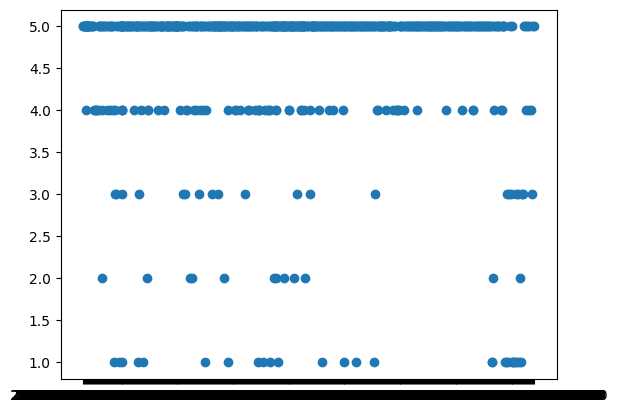

In [50]:
# x = time and y = score
x = product1['datetime'].to_numpy()
y = product1['Score'].to_numpy()

plt.scatter(x,y)
plt.show()